In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import datetime as dt
from sqlalchemy import distinct

In [5]:
#Creates the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model #making all the tables into 
#classes and populating those classes/tables with the date
Base = automap_base()    #Base is a variable and could be called anything
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()  # shows the names of the classes/tables


['measurement', 'station']

In [8]:
# Create our session (link) from Python to the DB - connects to the database

session=Session(bind=engine)  #creating a session to access the sql file (engine) connects to server or SQL file in this case

In [21]:
# Save references to each table  Base.Classes allows you to assign a variable to a Class 
Measurement=Base.classes.measurement
Station=Base.classes.station

In [22]:
#prints out column and first row data to see what is there.
# first_row=session.query(Measurement).first()
# first_row.__dict__
# first_row_st=session.query(Station).first()
# first_row_st.__dict__

# Exploratory Climate Analysis

In [23]:
# **Design a query to retrieve the last 12 months of precipitation data and plot the results

# **Calculate the date 1 year ago from the last data point in the database

last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(last_date)
prior_year=dt.date(2017,8,23) - dt.timedelta(days=365)
#print(prior_year)

#** Perform a query to retrieve the data and precipitation scores
lastyear_query=session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date > prior_year).all()
dict(lastyear_query)

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

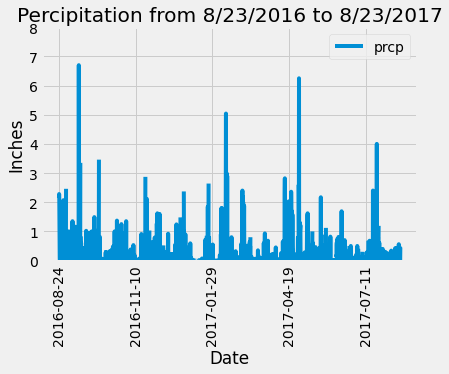

In [24]:
# **Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(lastyear_query, columns=['date', 'prcp'])
df.set_index('date')

#** Sort the dataframe by date
df=df.sort_values('date')
df

# **Use Pandas Plotting with Matplotlib to plot the data
df.plot('date','prcp')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Percipitation from 8/23/2016 to 8/23/2017')
plt.ylim(0,8)
plt.xticks(rotation=90)


In [25]:
# ** Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [26]:
# **Design a query to show how many stations are available in this dataset?
num_stations=session.query(func.count(Station.station)).all()
num_stations
print(f'There are {num_stations} stations in this dataset')

There are [(9,)] stations in this dataset


In [27]:
# **What are the most active stations? (i.e. what stations have the most rows)?
# **List the stations and the counts in descending order.

active_stations=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
#--Which station has the highest number of observations? (from above- most active station)
max_active_station=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
max_active_station[0]   #the query returned a tuple so use brackets to get value

print(f'The most active station is {max_active_station[0]}')

The most active station is USC00519281


In [29]:
#--Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.
# ***Using the station id from the previous query (of the most active station), calculate 
#the lowest temperature recorded, 

# select the MIN Measurement.tobs.min from Measurement where Measurement.station=max_station
#find all tobs for Max_station
#find the lowest value

#lowest_temp=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')

lowest_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station==max_active_station[0]).all()

print(f'The lowest temp for Station {max_active_station[0]} is {[lowest_temp]}')

#*** highest temperature recorded, 

highest_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station==max_active_station[0]).all()

print(f'The highest temp for Station {max_active_station[0]} is {[highest_temp]}')

#***and average temperature 

average_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station==max_active_station[0]).all()

print(f'The average temp for Station {max_active_station[0]} is {average_temp}')



The lowest temp for Station USC00519281 is [[(54.0,)]]
The highest temp for Station USC00519281 is [[(85.0,)]]
The average temp for Station USC00519281 is [(71.66378066378067,)]


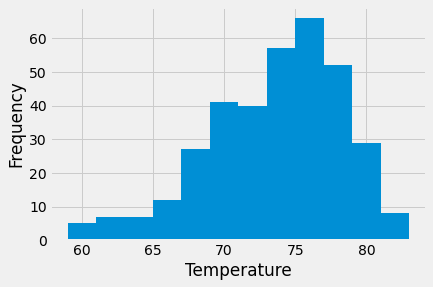

In [30]:

# ***Choose the station with the highest number of temperature observations (tobs).
# ***Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# STEPS
# 1.Design a query to retrieve the last 12 months of temperature observation data (TOBS).

#lastyear_tob=session.query(Measurement.tobs, Measurement.date).filter(Measurement.date > prior_year).all()
#lastyear_tob
                         
# 2. Filter by the station with the highest number of observations.

most_lastyear_tobs=session.query(Measurement.tobs, Measurement.date, Measurement.station).filter(Measurement.date > prior_year)\
         .filter(Measurement.station==max_active_station[0]).all()
most_lastyear_tobs
#
#most_lastyear_tobs=session.query(Measurement.tobs, func.count(Measurement.tobs)).filter(Measurement.date > prior_year)\
#          .filter(Measurement.station==max_active_station[0]).group_by(Measurement.tobs).all()
#most_lastyear_tobs

x=[each_result[0] for each_result in most_lastyear_tobs]

# 3. Plot the results as a histogram with bins=12.
plt.hist(x, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()



## Bonus Challenge Assignment

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
